In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

In [2]:
def generate_synthetic_dataset(num_samples):
    """ Takes num of samples and return the df with one features and two class """
    np.random.seed(0)
    samples = int(num_samples /2)
    label_0 = np.zeros(samples)
    label_1 = np.ones(samples)

    mu_1 = 12
    sigma_1 = 5
    class_1_data = np.random.normal(mu_1, sigma_1, samples)
    mu_0 = 0
    sigma_0 = 4
    class_0_data = np.random.normal(mu_0, sigma_0, samples)
    data  =  np.concatenate((class_0_data, class_1_data)) 
    labels = np.concatenate((label_0, label_1))

    d = {
        "feature": data,
        "Label": labels
    }
    df = pd.DataFrame(data =d)
    return df



In [3]:
def data_visualization(df):
    class_0_data = df[df['Label'] == 0]['feature']
    class_1_data = df[df['Label'] == 1]['feature']

    plt.figure()
    sns.kdeplot(class_0_data, color='blue', label='Class 0')
    sns.kdeplot(class_1_data, color='red', label='Class 1')

    plt.scatter(class_0_data, np.zeros_like(class_0_data), color='blue', alpha=0.6, label='Class 0 Samples')
    plt.scatter(class_1_data, np.zeros_like(class_1_data), color='red', alpha=0.6, label='Class 1 Samples')

    plt.title('Class Conditional Density Plot of Feature')
    plt.ylim(-0.05, .15)
    plt.xlabel('Feature')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.show()

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
def select_model(model):
    if model == "logistic_regression" :
        return LogisticRegression() 
    elif model == "naive_bayes":
        return GaussianNB()
    elif model == "random_forest":
        return RandomForestClassifier(max_depth=2, random_state=0)
    else:
        raise ValueError("Unknown model type: {}".format(model))

In [5]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score
df = generate_synthetic_dataset(1000)

X = df[['feature']]
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_names = ["logistic_regression", "naive_bayes", "random_forest"]

for model_name in model_names:
    model = select_model(model_name)
    model.fit(X, y)
    y_pred = model.predict(X)
    # global performance
    global_accuracy = accuracy_score(y, y_pred)
    # Cross validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=kf)
    print(f"Model name: {model_name}, global_accuracy: {global_accuracy}, Scores for each fold: {scores}, Average_score: {np.mean(scores)}")
    


Model name: logistic_regression, global_accuracy: 0.912, Scores for each fold: [0.92  0.915 0.89  0.92  0.91 ], Average_score: 0.9109999999999999
Model name: naive_bayes, global_accuracy: 0.914, Scores for each fold: [0.925 0.925 0.895 0.915 0.905], Average_score: 0.913
Model name: random_forest, global_accuracy: 0.919, Scores for each fold: [0.925 0.935 0.9   0.925 0.9  ], Average_score: 0.9170000000000001


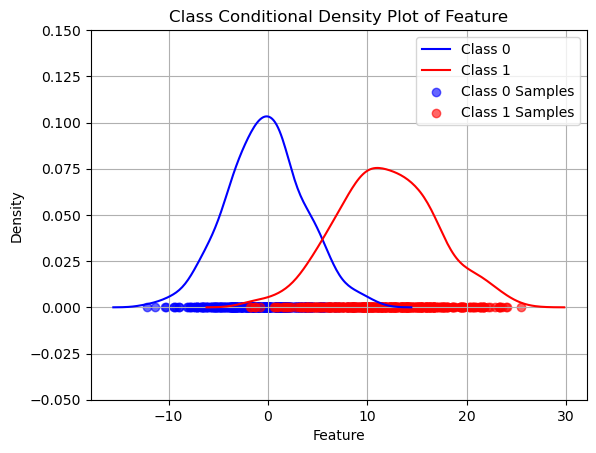

In [6]:
data_visualization(df)

In [7]:
model = select_model("logistic_regression")
model.fit(X,y)


LogisticRegression()

model.

In [12]:
# Function for the calculate the common area between the two pdf
from scipy import stats
from scipy.integrate import cumulative_trapezoid

def calculate_pdf(df):
    """Calculate pdf using kernel density estimate"""
    class_0_data = df[df["Label"] == 0]["feature"]
    class_1_data = df[df['Label'] == 1]['feature']
    kde0 = stats.gaussian_kde(class_0_data)
    kde1 = stats.gaussian_kde(class_1_data)
    #x = np.linspace(-15, 30, 50000)
    #y1 = kde0.pdf(x)
    #y2 = kde1.pdf(x)
    return kde0, kde1

# def calculate_cdf(x, pdf):
#     """Calculate cdf from pdf using numerical integration"""
#     cdf = cumulative_trapezoid(pdf, x, initial=0)
#     cdf /= cdf[-1]  # Normalize to ensure the cdf ranges from 0 to 1
#     return cdf

# def calculate_crossover_area(x, cdf1, cdf2, intersection_point):
#     """ Calculate the common area between intersection point """
#     common_area = 1- cdf1[intersection_point] + cdf2[intersection_point])
#     return common_area

def calculate_cdf(kde, th):
    return kde.integrate_box_1d(-np.inf, th)

def calculate_crossover_area(cdf1, cdf2):
    common_area = 1- cdf1  + cdf2
    return common_area
    
# def plot_pdf_cdf(x, pdf1, cdf1, pdf2, cdf2, intersection):
#     """Plot PDF and CDF"""
#     plt.figure(figsize=(12, 6))

#     # Plot PDF
#     plt.subplot(1, 2, 1)
#     plt.plot(x, pdf1, label='Class 0 PDF')
#     plt.plot(x, pdf2, label='Class 1 PDF')
#     plt.axvline(x[intersection], color='red', linestyle='--', label=f'Intersection at {x[intersection]:.2f}')
#     plt.title('PDF')
#     plt.ylim(-0.05, .15)
#     plt.legend()

#     plt.subplot(1, 2, 2)
#     plt.plot(x, cdf1, label='Class 0 CDF')
#     plt.plot(x, cdf2, label='Class 1 CDF')
#     plt.title('CDF')
#     plt.legend()

#     plt.tight_layout()
#     plt.show()
    

kde0, kde1 = calculate_pdf(df)
max = df["feature"].max()

x = np.linspace(-15, 30, 50000)
y1 = kde0.pdf(x)
y2 = kde1.pdf(x)
intersection_point = np.argmin(np.abs(y1-y2))

cdf1 = calculate_cdf(kde0, x[intersection_point])
cdf2 = calculate_cdf(kde1, x[intersection_point])
print(x[intersection_point])
#intersection_point, x[intersection_point], pdf1[intersection_point]
#plot_pdf_cdf(x, pdf1, cdf1, pdf2, cdf2, intersection_point)

area = calculate_crossover_area(cdf1, cdf2)
print(f"The cross over area between the two pdf is: {area: .4f}")


5.477209544190885
The cross over area between the two pdf is:  0.1881


In [15]:
# error computation within particular segment 
# Divide the sample space and generate the pdf and cdf
# then calculate the error form them

display(df.shape)
# segment the dataset
df = df.sort_values("feature")
#display(df.head())
diff = df["Label"].diff()
diff =diff.bfill()

change_points = df["feature"][(np.abs(diff)>0).shift(-1, fill_value=False)].values + (df["feature"][np.abs(diff)>0].values - df["feature"][(np.abs(diff)>0).shift(-1, fill_value=False)].values) /2
segments = [(df['feature'].min(), change_points[0])] + \
           [(change_points[i], change_points[i + 1]) for i in range(len(change_points) - 1)] + \
           [(change_points[-1], df['feature'].max())]
segments

class_0_data = df[df["Label"] == 0]["feature"]
class_1_data = df[df["Label"] == 1]["feature"]

kde_class_0 = stats.gaussian_kde(class_0_data)
kde_class_1 = stats.gaussian_kde(class_1_data)
x = np.linspace(-15, 30, 50000)
y1 = kde_class_0.pdf(x)
y2 = kde_class_1.pdf(x)
## plot the pdf
# plt.figure()
# plt.plot(x, y1, label='Class 0')
# plt.plot(x, y2, label='Class 1')
# plt.xlabel('Value')
# plt.ylabel('Density')
# plt.title('Kernel Density Estimate')
# plt.legend()
# plt.show()
# Initialize a list to store segment probabilities
segment_probabilities = []
for start, end in segments:
    segment = df[(df['feature'] >= start) & (df['feature'] < end)]
    # display(start, end)
    actual_value = segment["Label"].iloc[0]
    #print(actual_value)
    probabilities = []
    
    if actual_value == 0.0:
            # index = np.argmin(np.abs(x-feature_value))
        segment_probabilities.append(kde_class_1.integrate_box_1d(start, end))
    # else:
    #     segment_probabilities.append(kde_class_0.integrate_box_1d(start, end))
        
    
    
print(segment_probabilities)
total_error_probability_all_segments = np.sum(segment_probabilities)



print(f"Total error probability across all segments: {total_error_probability_all_segments:.4f}")


print(f"Accuracy: {1- total_error_probability_all_segments}")


(1000, 2)

[0.004043941911651497, 0.0005162032025127109, 0.0013210841896397207, 0.002083913035250159, 0.006744156918884809, 0.0009723296418227513, 0.0010937746846538129, 0.0007471258024410902, 0.004402768724110795, 0.0010379096458883665, 0.0018239244076100137, 0.0006122028195739534, 0.0019040778711299248, 0.00224536496415583, 0.00615333185071552, 0.005932643431232133, 0.0005677219053542802, 0.002027953931701282, 0.001071291427195085, 0.0004140271472233569, 0.0011574299751931055, 0.0028318990594243926, 0.000999600380058996, 0.0007054823482854462, 0.0014202757977924176, 0.0013985057216767795, 0.002525999937110391, 0.0003555939123850343, 0.005953006299286249, 0.0014107226632307634, 0.0009035946804005737, 0.0003189886415803798, 0.004146578958844802, 0.0007025409009498104, 0.0041379484671818486, 0.0013804229914964124, 0.0008542309953085132, 0.0018043044952095908, 0.004071919525877635, 0.002529787925857198, 0.001766790788401892, 0.0011514096376100116, 0.002595181006127174, 0.0005251292416683674, 0.0002

In [ ]:
print(kde_class_1.integrate_box_1d(-np.inf, segments[0][1]))
print(calculate_cdf(segments[0][1], y2))

In [ ]:
# error computation within particular segment 
# Divide the sample space and generate the pdf and cdf
# then calculate the error form them

display(df.shape)
# segment the dataset
df = df.sort_values("feature")
#display(df.head())
diff = df["Label"].diff()
diff =diff.bfill()

change_points = df["feature"][(np.abs(diff)>0).shift(-1, fill_value=False)].values + (df["feature"][np.abs(diff)>0].values - df["feature"][(np.abs(diff)>0).shift(-1, fill_value=False)].values) /2
segments = [(df['feature'].min(), change_points[0])] + \
           [(change_points[i], change_points[i + 1]) for i in range(len(change_points) - 1)] + \
           [(change_points[-1], df['feature'].max())]
segments
class_0_data = df[df["Label"] == 0]["feature"]
class_1_data = df[df["Label"] == 1]["feature"]

kde_class_0 = stats.gaussian_kde(class_0_data)
kde_class_1 = stats.gaussian_kde(class_1_data)
x = np.linspace(-15, 30, 50000)
y1 = kde_class_0.pdf(x)
y2 = kde_class_1.pdf(x)
## plot the pdf
plt.figure()
plt.plot(x, y1, label='Class 0')
plt.plot(x, y2, label='Class 1')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Kernel Density Estimate')
plt.legend()
plt.show()
# Initialize a list to store segment probabilities
segment_probabilities = []
for start, end in segments:
    segment = df[(df['feature'] >= start) & (df['feature'] < end)]
    display(segment)

    probabilities = []
    for index, row in segment.iterrows():
        feature_value = row["feature"]
        actual_value = row["Label"]
        #display(feature_value)
        #display(actual_value)
        if actual_value == 0.0:
            # index = np.argmin(np.abs(x-feature_value))
            stats.integrate_box_1d(segments
            probabilities.append(y2[index])
        else:
            index = np.argmin(np.abs(x-feature_value))
            probabilities.append(y1[index])
            
    total_error_probability = np.sum(probabilities)
    
    segment_probabilities.append((start, end, total_error_probability))

total_error_probability_all_segments = np.sum([prob for _, _, prob in segment_probabilities])

for start, end, prob in segment_probabilities:
    print(f"Segment {start:.2f} - {end:.2f}: Total error probability = {prob:.4f}")

print(f"Total error probability across all segments: {total_error_probability_all_segments:.4f}")


print(f"Accuracy: {100- total_error_probability_all_segments}")
